# Рабочая Тетрадь №4 Меджидов М.С БФБО-01-22


# Задача 1
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.


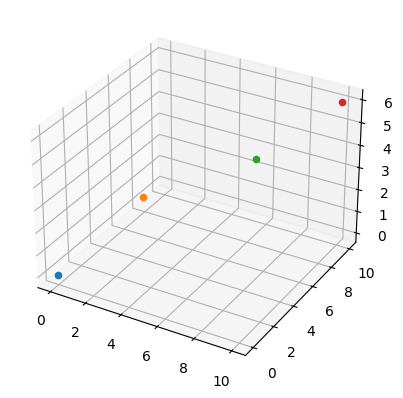

Растояние евклида от точки 0 до точки 1: 5.196152422706632
Квадрат растояния евклида от точки 0 до точки 1: 27.0
Дистанция Чебышева от точки 0 до точки 1: 3.0
Дистанция Хемингтона от точки 0 до точки 1: 9.0

Растояние евклида от точки 1 до точки 2: 5.744562646538029
Квадрат растояния евклида от точки 1 до точки 2: 33.0
Дистанция Чебышева от точки 1 до точки 2: 4.0
Дистанция Хемингтона от точки 1 до точки 2: 9.0

Растояние евклида от точки 2 до точки 3: 4.69041575982343
Квадрат растояния евклида от точки 2 до точки 3: 22.0
Дистанция Чебышева от точки 2 до точки 3: 3.0
Дистанция Хемингтона от точки 2 до точки 3: 8.0



In [2]:
import matplotlib.pyplot as plt
import numpy as np

euclid = lambda x, y: np.linalg.norm(x - y)
euclid_square = lambda x, y: euclid(x, y) ** 2
distanse_chebishev = lambda x, y: np.linalg.norm(x - y, ord=np.inf)
distanse_hemming = lambda x, y: np.linalg.norm(x - y, ord=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
ax.scatter(7, 7, 4)
ax.scatter(10, 10, 6)
plt.show()

x1 = np.array([0, 0, 0])
x2 = np.array([3, 3, 3])
x3 = np.array([7, 7, 4])
x4 = np.array([10, 10, 6])
x_mass = [x1, x2, x3, x4]
ind = 0
for x in x_mass:
    try:
        print(f'Растояние евклида от точки {ind} до точки {ind+1}: {euclid(x, x_mass[ind + 1])}')
        print(f'Квадрат растояния евклида от точки {ind} до точки {ind+1}: {euclid_square(x, x_mass[ind + 1])}')
        print(f'Дистанция Чебышева от точки {ind} до точки {ind+1}: {distanse_chebishev(x, x_mass[ind + 1])}')
        print(f'Дистанция Хемингтона от точки {ind} до точки {ind+1}: {distanse_hemming(x, x_mass[ind + 1])}\n')
        ind+=1
    except IndexError:
        break




# Задание 2
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты. Выведите матрицу ошибок, обоснуйте значение точности:

(127, 4) (23, 4) (127,) (23,)
['versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'virginica']
accuracy: 0.957
[[ 5  0  0]
 [ 0 11  1]
 [ 0  0  6]]


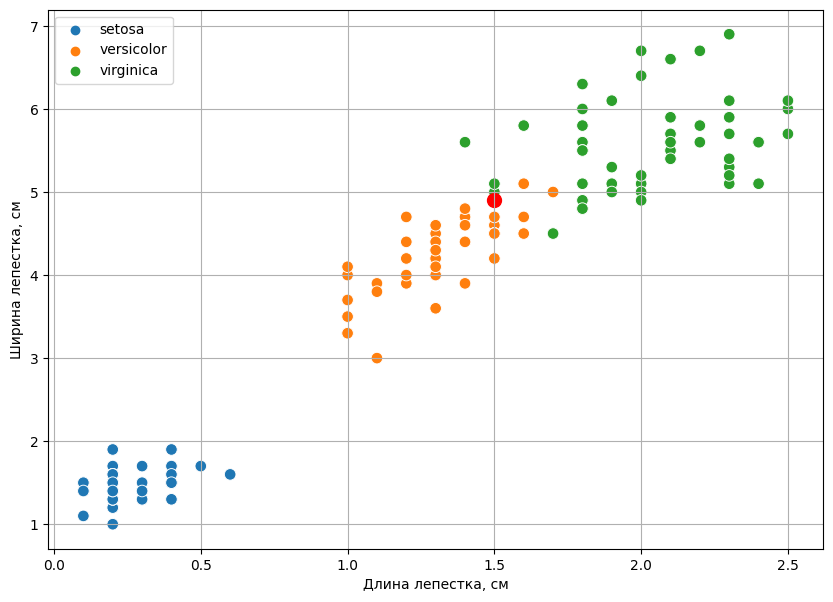

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Заимствуем датасет
iris = sns.load_dataset('iris')

x_train, x_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size=0.15  # Процент выборки 15%
)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# Обучим метод ближайших соседей
model = KNeighborsClassifier(n_neighbors=5)  # Изменяем количество ближайших соседей
model.fit(x_train, y_train)

# Получим предсказания модели
y_pred = model.predict(x_test)
print(y_pred)

# Покажем на графике, что отражает полученное число.
# Красным цветом обозначим точки, для которых классификация сработала неправильно:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

# Перебираем все объекты из теста:
for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(x_test.iloc[i, 3],
                    x_test.iloc[i, 2],
                    color='red',
                    s=100
                    )

print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

# Выводим матрицу ошибок:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
plt.show()

# Задание 3
Создать свой пример датафрейма, описывающий объект исследования
человек набором признаком. Произвести предобработку данных.
Произвести нормировку данных в диапазон от 0 до 1. Перевести
категориальные данные в числовые. Если есть идеи, предложите свои
варианты обработки данных.

In [13]:
# TODO: Создать свой пример датафрейма, описывающий объект исследования
#   человек набором признаком. Произвести предобработку данных.
#   Произвести нормировку данных в диапазон от 0 до 1. Перевести
#   категориальные данные в числовые. Если есть идеи, предложите свои
#   варианты обработки данных.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)

df = pd.DataFrame({
    'name': ['Ivan', 'Nastya', 'Alex', 'Timur', 'Magomed'],
    'age': [45, 26, 41, 21, 23],
    'sex': ['m', 'f', 'm', 'm', 'm'],
    'income': [100000, 80000, 60000, 40000, 150000],
    'eyes code': ['green', 'black', 'blue', 'black', 'black'],
    'city of birth': ['Msc', 'Msc', 'Msc', 'Msc', 'Tula'],
    'work city': ['Tula', 'Tula', 'Tula', 'Msc', 'Msc']},
    index=[0, 1, 2, 3, 4])

sex_code = {'m': 1, 'f': 0}
eyes_code = {'green': 1, 'black': 0,'blue':2}
df['sex'] = df['sex'].replace(sex_code)
df['eyes code'] = df['eyes code'].replace(eyes_code)

scaler = MinMaxScaler()
df[['age']] = scaler.fit_transform(df[['age']])
df[['income']] = scaler.fit_transform(df[['income']])

df = pd.get_dummies(df, columns=['city of birth'])
df

,name,age,sex,income,eyes code,work city,city of birth_Msc,city of birth_Tula
0,Ivan,1.000000,1,0.545455,1,Tula,1,0
1,Nastya,0.208333,0,0.363636,0,Tula,1,0
2,Alex,0.833333,1,0.181818,2,Tula,1,0
3,Timur,0.000000,1,0.000000,0,Msc,1,0
4,Magomed,0.083333,1,1.000000,0,Msc,0,1


# Задание 5 
Загрузите предложенный учебный датасет (dataset = pd.read_csv('Dataset
Knn.csv') или создайте свой, описывающий прикладную задачу
классификации. Выполните обработку данных, нормализацию и перевод
категориальных признаков в числовые. Реализуйте метод К-ближайших
соседей. С оценкой точности и выводом матрицы ошибок.

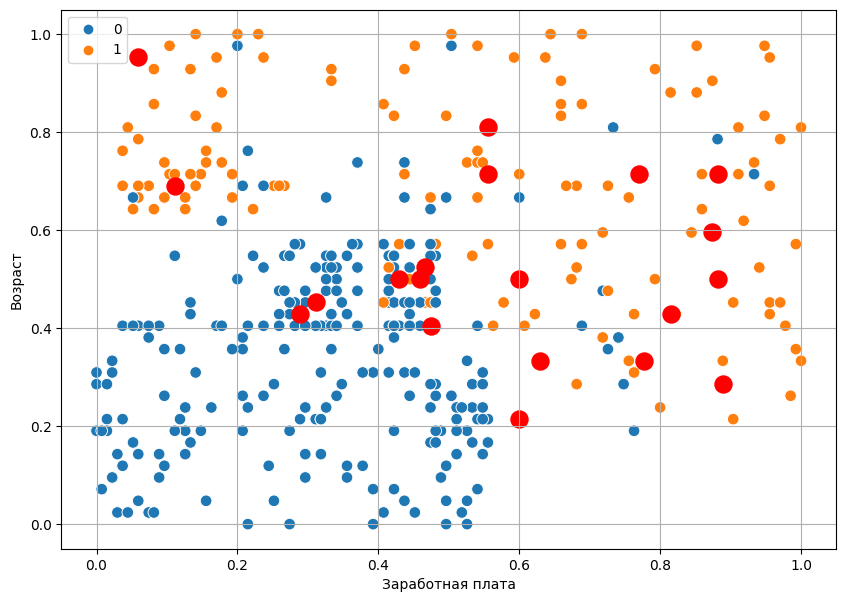

accuracy: 0.667


,ID,Пол,Возраст,Заработная плата,Покупка
0,1,1,0.023810,0.029630,0
1,2,1,0.404762,0.037037,0
2,3,0,0.190476,0.207407,0
3,4,0,0.214286,0.311111,0
4,5,1,0.023810,0.451852,0
5,6,1,0.214286,0.318519,0
6,7,0,0.214286,0.511111,0
7,8,0,0.333333,1.000000,1
8,9,1,0.166667,0.133333,0
9,10,0,0.404762,0.370370,0


In [23]:
# TODO: Загрузите предложенный учебный датасет (dataset = pd.read_csv('Dataset
#   Knn.csv') или создайте свой, описывающий прикладную задачу
#   классификации. Выполните обработку данных, нормализацию и перевод
#   категориальных признаков в числовые. Реализуйте метод К-ближайших
#   соседей. С оценкой точности и выводом матрицы ошибок.

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

df = pd.read_csv('Dataset Knn.csv')
scaler = MinMaxScaler()
sex = {'М': 1, 'Ж': 0}

df[['Возраст']] = scaler.fit_transform(df[['Возраст']])
df[['Заработная плата']] = scaler.fit_transform(df[['Заработная плата']])
df['Пол'] = df['Пол'].replace(sex)

x_train, x_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1],
    df.iloc[:, -1],
    test_size=0.15
)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Заработная плата',
                y='Возраст',
                data=df,
                hue='Покупка',
                s=70)
plt.xlabel('Заработная плата')
plt.ylabel('Возраст')
plt.legend(loc=2)
plt.grid()
for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)
plt.show()
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cm
df
